In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import torch
from backend.pytorch import DET_ARCHS, RECO_ARCHS, forward_image, load_predictor

from translation import translate_lines, update_page_with_layout
from utils import synthesize_page, extract_source_target_pairs
from doctr.io import DocumentFile

In [24]:
%cd /home/compiling-ganesh/24m0797/workspace/doctr-dit

/home/compiling-ganesh/24m0797/workspace/doctr-dit


/home/compiling-ganesh/24m0797/workspace/doctr-dit/demo
/home/compiling-ganesh/24m0797/workspace/doctr-dit

0: 1024x736 18 segments, 1320.6ms
Speed: 4.2ms preprocess, 1320.6ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 736)
No 75% match: {'value': '27', 'confidence': 0.9111691117286682, 'geometry': ((np.float64(0.8853481980961015), np.float64(0.9169921875)), (np.float64(0.9033034904805077), np.float64(0.9287109375))), 'objectness_score': 0.757200300693512, 'crop_orientation': {'value': 0, 'confidence': None}}


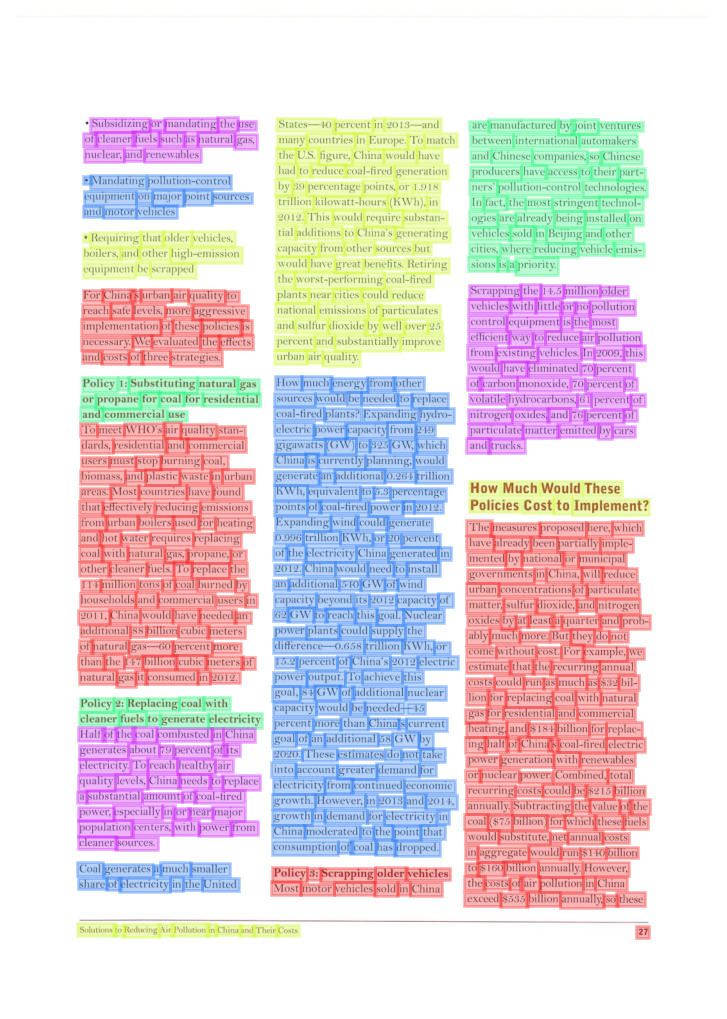

In [51]:
%cd /home/compiling-ganesh/24m0797/workspace/doctr-dit/demo
import translation
import visualization
import importlib
importlib.reload(translation)
importlib.reload(visualization)
from translation import translate_lines, update_page_with_layout
from visualization import visualize_page
%cd /home/compiling-ganesh/24m0797/workspace/doctr-dit

doc_path = "data/dit-trans-proc/val/images/52.jpg"
if doc_path.endswith((".pdf", ".PDF")):
    doc = DocumentFile.from_pdf(doc_path)
else:
    doc = DocumentFile.from_images(doc_path)
page = doc[0]

forward_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

predictor = load_predictor(
    det_arch=DET_ARCHS[0],
    reco_arch=RECO_ARCHS[0],
    assume_straight_pages=True,
    straighten_pages=False,
    export_as_straight_boxes=False,
    disable_page_orientation=False,
    disable_crop_orientation=False,
    bin_thresh=0.3,
    box_thresh=0.1,
    device=forward_device,
)

out = predictor([page])
page_export = out.pages[0].export()
page_export, old_lines = update_page_with_layout(page, page_export)
fig = visualize_page(page_export, out.pages[0].page, old_lines=old_lines, interactive=False, add_labels=False)